# Air pressure comparing

This notebook lets compare air pressure variation in the following countries:
- Sweden
- Indonesia
- Russia
- United Kingdom

## Data sources

All data downloaded from [Iowa State University ASOS Archive](https://mesonet.agron.iastate.edu/request/download.phtml) at __06 Feb 2022__ for the period from __01 Jan 2011__ to __05 Feb 2022__.


### Used columns

- __station__: three or four character site identifier
- __valid__: timestamp of the observation in UTC
- __alti__: Pressure altimeter in inches


[Full Datasource Description](./DS_DESCRIPTION.md)

In [33]:
import pandas as pd

## Common parameters

In [34]:
# A valid range of air pressure in inches --- used for invalid data exclusion
# the values aren't included in the range of valid values

AIR_P_MIN = 22
AIR_P_MAX = 32

# Sweden

In [35]:
# Loading the necessary data
df_sw = pd.read_csv('./data/asos_sweden.tsv', sep='\t', na_values='M', usecols=['station', 'valid', 'alti'])

# Extracting data for selected stations
# 'ESKN' : 'Stockholm 1',
# 'ESSA' : 'Stockholm 2',
# 'ESSB' : 'Stockholm 3'
df_sw = df_sw[df_sw['station'].isin(['ESKN', 'ESSB', 'ESSA'])]

# Skipping invalid air pressure data
df_sw.drop(df_sw[(df_sw['alti'] < AIR_P_MIN) | (df_sw['alti'] > AIR_P_MAX)].index, inplace=True)

<AxesSubplot:xlabel='valid'>

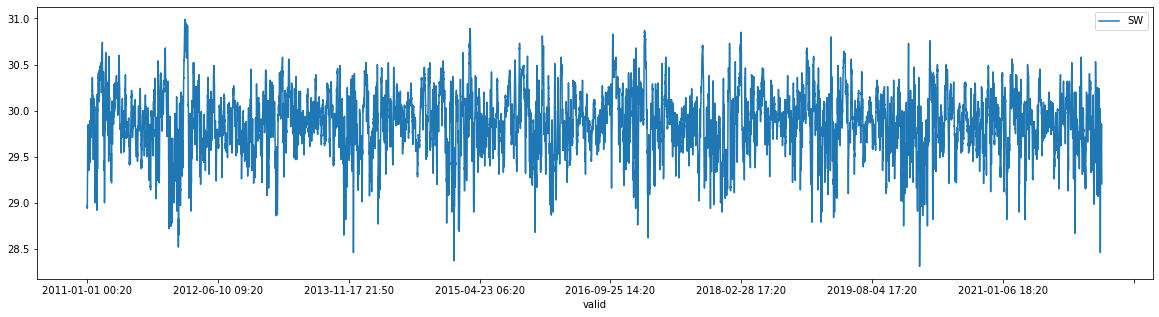

In [36]:
# Checking for invalid data
pvt_sw = pd.pivot_table(df_sw.reset_index(), index='valid', values='alti')

pvt_sw.rename(columns={'alti': 'SW'}, inplace=True)

pvt_sw.plot(figsize=(20, 5))

In [37]:
pvt_sw.std()

SW    0.336047
dtype: float64

array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>], dtype=object)

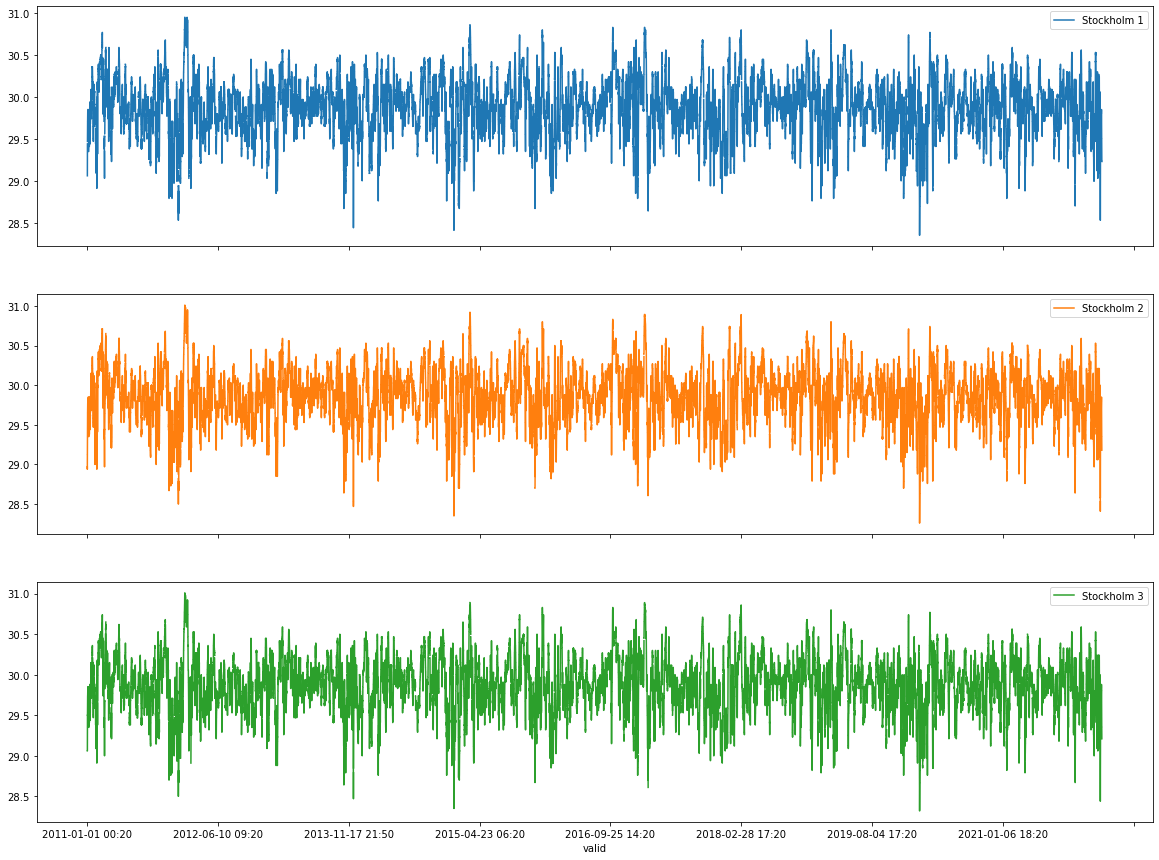

In [38]:
pvt_sw = pd.pivot_table(df_sw.reset_index(), index='valid', values='alti', columns=['station']) # show all stations

pvt_sw.rename(columns={
    'ESKN' : 'Stockholm 1',
    'ESSA' : 'Stockholm 2',
    'ESSB' : 'Stockholm 3'
}, inplace=True)

pvt_sw.plot(figsize=(20, 15), subplots=True)

In [39]:
pvt_sw.std()

station
Stockholm 1    0.331545
Stockholm 2    0.340274
Stockholm 3    0.336647
dtype: float64

# Indonesia

In [40]:
df_in = pd.read_csv('./data/asos_indonesia.tsv', sep='\t', na_values='M', usecols=['station', 'valid', 'alti'])

df_in = df_in[df_in['station'].isin(['WIDN', 'WALL', 'WIHH', 'WIII'])]
# 'WIND' : 'Tanjung Pinang',
# 'WALL' : 'Balikpapan',
# 'WIHH' : 'Jakarta 1',
# 'WIII' : 'Jakarta 2'

df_in.drop(df_in[(df_in['alti'] < AIR_P_MIN) | (df_in['alti'] > AIR_P_MAX)].index, inplace=True)

<AxesSubplot:xlabel='valid'>

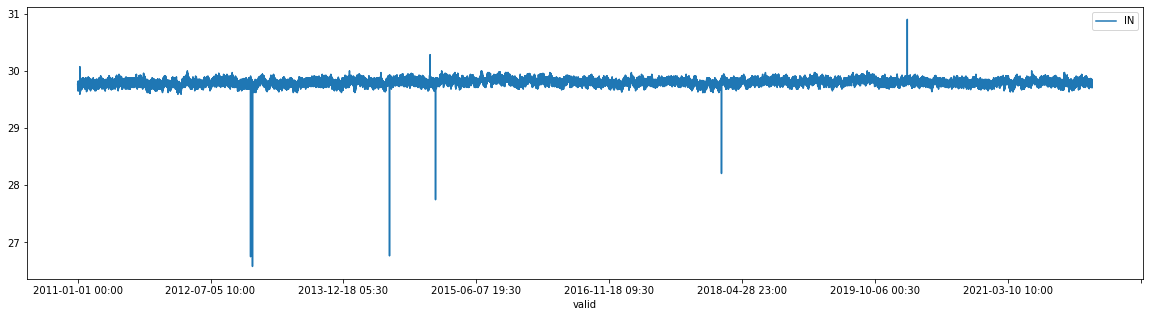

In [41]:
pvt_in = pd.pivot_table(df_in.reset_index(), index='valid', values='alti')

pvt_in.rename(columns={'alti': 'IN'}, inplace=True)

pvt_in.plot(figsize=(20, 5))

In [42]:
pvt_in.std()

IN    0.053599
dtype: float64

array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>],
      dtype=object)

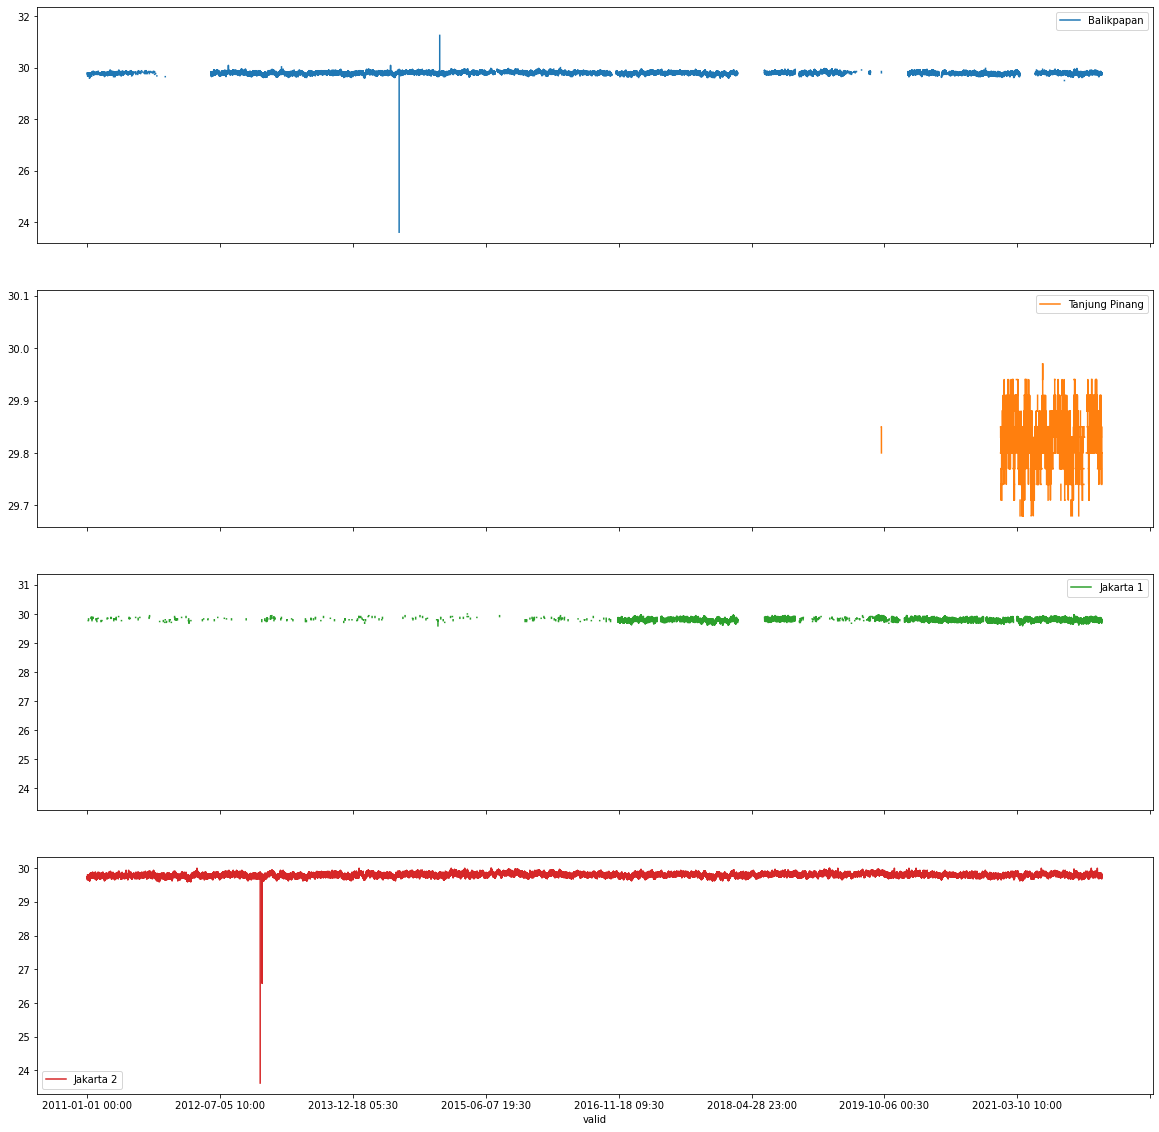

In [43]:
pvt_in = pd.pivot_table(df_in.reset_index(), index='valid', values='alti', columns=['station'])
pvt_in.rename(columns={
    'WIDN' : 'Tanjung Pinang',
    'WALL' : 'Balikpapan',
    'WIHH' : 'Jakarta 1',
    'WIII' : 'Jakarta 2'
}, inplace=True)
pvt_in.plot(figsize=(20, 20), subplots=True)

In [44]:
pvt_in.std()

station
Balikpapan        0.060030
Tanjung Pinang    0.051211
Jakarta 1         0.062496
Jakarta 2         0.054692
dtype: float64

# Russia

In [45]:
df_ru = pd.read_csv('./data/asos_russia.tsv', sep='\t', na_values='M', usecols=['station', 'valid', 'alti'])

df_ru = df_ru[df_ru['station'].isin(['UUEE', 'UUWW', 'UUMO', 'UUDD', 'UUBW', 'USRR'])]
# 'UUEE' : 'Moscow 1',
# 'UUWW' : 'Moscow 2',
# 'UUMO' : 'Moscow 3',
# 'UUDD' : 'Moscow 4',
# 'UUBW' : 'Ramehskoe',
# 'USRR' : 'Surgut'

df_ru.drop(df_ru[(df_ru['alti'] < AIR_P_MIN) | (df_ru['alti'] > AIR_P_MAX)].index, inplace=True)

<AxesSubplot:xlabel='valid'>

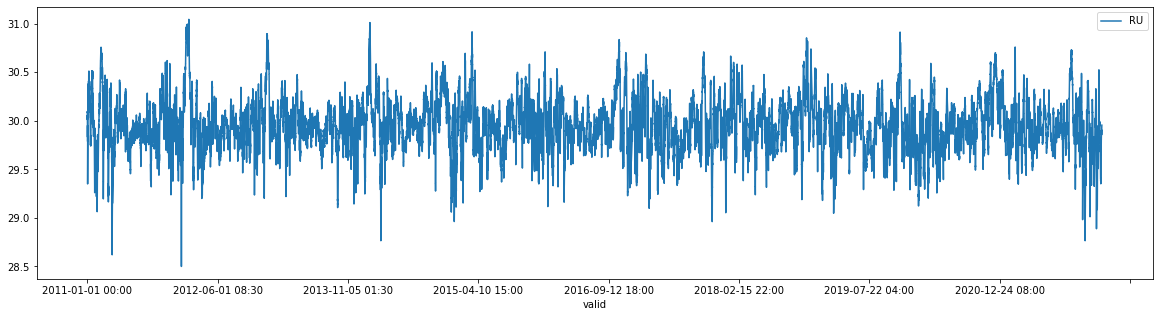

In [46]:
pvt_ru = pd.pivot_table(df_ru.reset_index(), index='valid', values='alti')

pvt_ru.rename(columns={'alti': 'RU'}, inplace=True)

pvt_ru.plot(figsize=(20, 5))

In [47]:
pvt_ru.std()

RU    0.269828
dtype: float64

array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>],
      dtype=object)

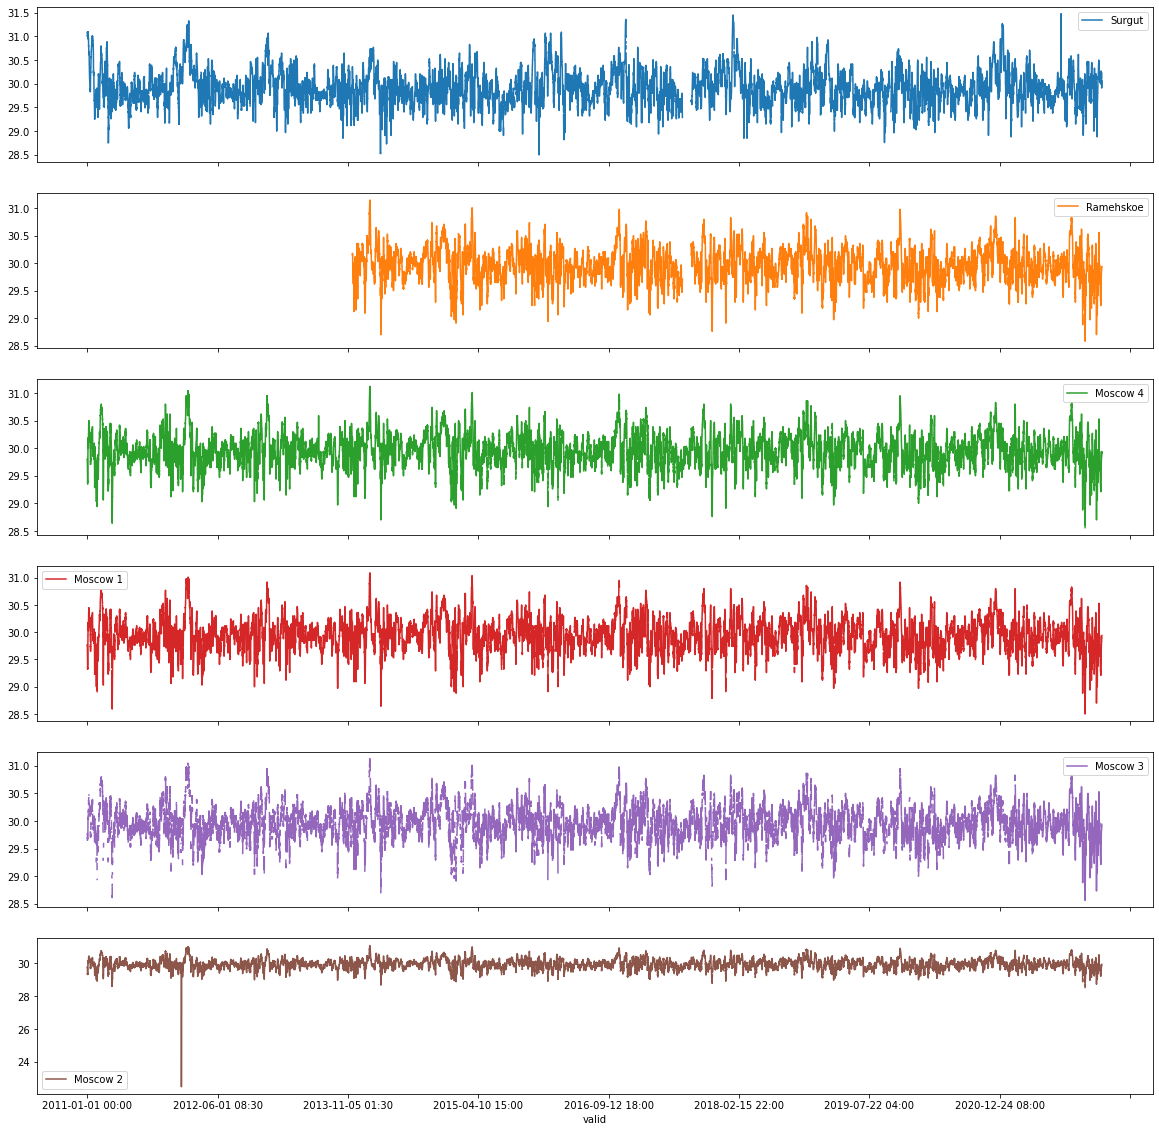

In [48]:
pvt_ru = pd.pivot_table(df_ru.reset_index(), index='valid', values='alti', columns=['station'])

pvt_ru.rename(columns={
    'UUEE' : 'Moscow 1',
    'UUWW' : 'Moscow 2',
    'UUMO' : 'Moscow 3',
    'UUDD' : 'Moscow 4',
    'UUBW' : 'Ramehskoe',
    'USRR' : 'Surgut'
}, inplace=True)

pvt_ru.plot(figsize=(20, 20), subplots=True)

In [49]:
pvt_ru.std()

station
Surgut       0.360180
Ramehskoe    0.306256
Moscow 4     0.300979
Moscow 1     0.303987
Moscow 3     0.297792
Moscow 2     0.299815
dtype: float64

# Great Britain

In [50]:
df_gb = pd.read_csv('./data/asos_great_britain.tsv', sep='\t', na_values='M', usecols=['station', 'valid', 'alti'])

df_gb = df_gb[df_gb['station'].isin(['EGWU', 'EGLL', 'EGLC', 'EGKB'])]
# 'EGWU' : 'Northolt',
# 'EGLC' : 'London 1',
# 'EGLL' : 'London 2',
# 'EGKB' : 'Biggin Hill'

df_gb.drop(df_gb[(df_gb['alti'] < AIR_P_MIN) | (df_gb['alti'] > AIR_P_MAX)].index, inplace=True)

<AxesSubplot:xlabel='valid'>

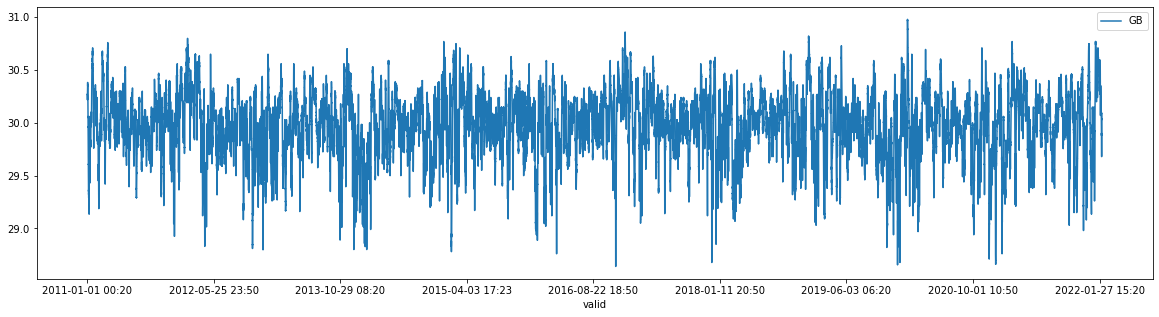

In [51]:
pvt_gb = pd.pivot_table(df_gb.reset_index(), index='valid', values='alti')

pvt_gb.rename(columns={'alti': 'GB'}, inplace=True)

pvt_gb.plot(figsize=(20, 5))

In [52]:
pvt_gb.std()

GB    0.317707
dtype: float64

array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>],
      dtype=object)

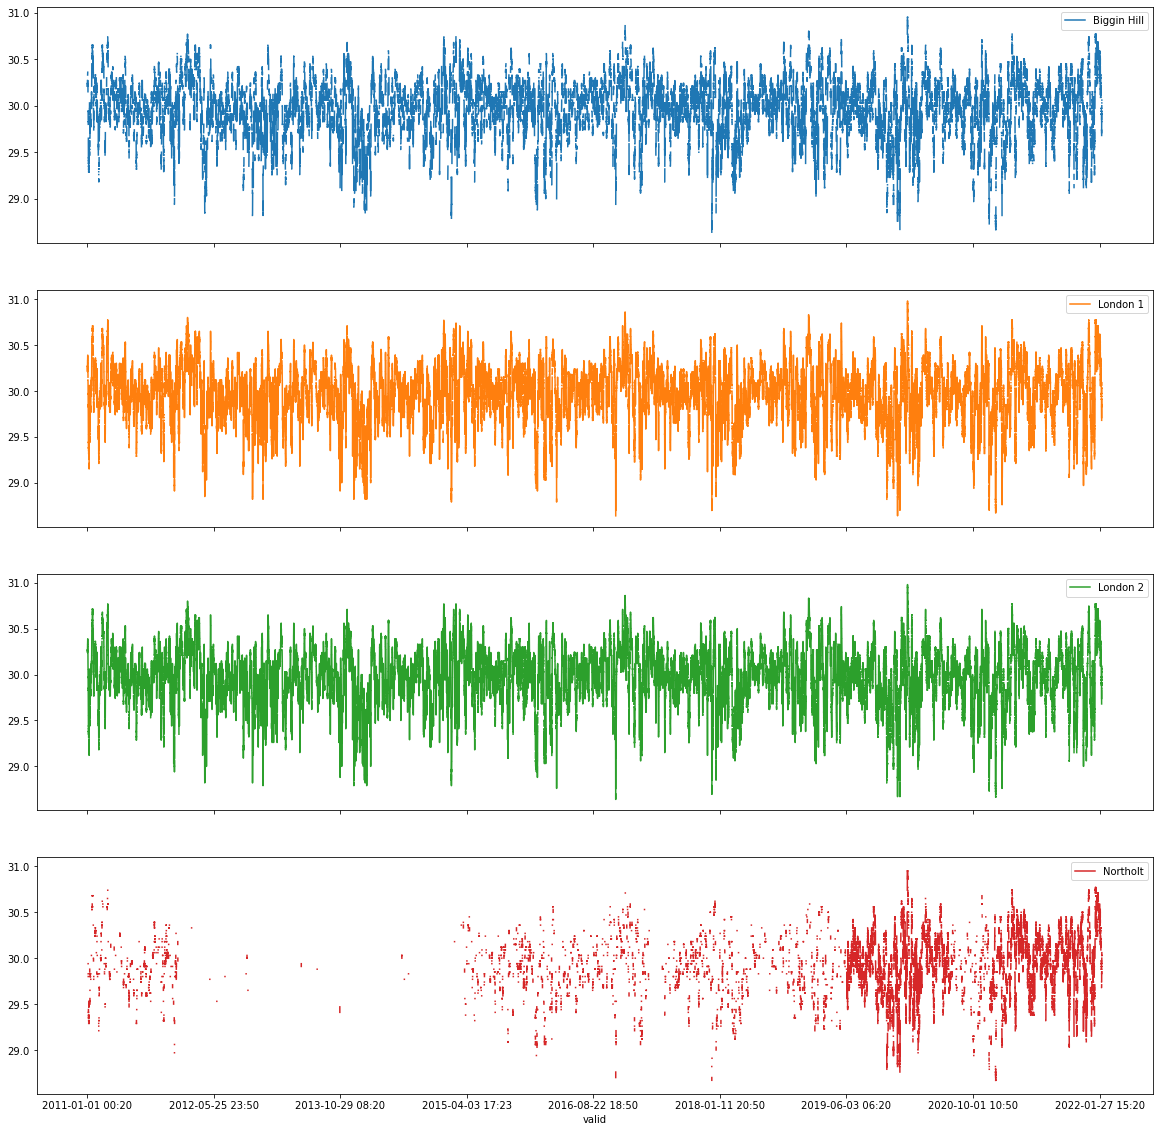

In [53]:
pvt_gb = pd.pivot_table(df_gb.reset_index(), index='valid', values='alti', columns=['station'])

pvt_gb.rename(columns={
    'EGWU' : 'Northolt',
    'EGLC' : 'London 1',
    'EGLL' : 'London 2',
    'EGKB' : 'Biggin Hill'
}, inplace=True)

pvt_gb.plot(figsize=(20, 20), subplots=True)

In [54]:
pvt_gb.std()

station
Biggin Hill    0.313998
London 1       0.316777
London 2       0.317693
Northolt       0.321032
dtype: float64

# Conclusions

In [80]:
pvt = pd.concat([pvt_sw, pvt_in, pvt_ru, pvt_gb], axis=1)

pvt.head()

station,Stockholm 1,Stockholm 2,Stockholm 3,Balikpapan,Tanjung Pinang,Jakarta 1,Jakarta 2,Surgut,Ramehskoe,Moscow 4,Moscow 1,Moscow 3,Moscow 2,Biggin Hill,London 1,London 2,Northolt
valid,,,,,,,,,,,,,,,,,
2011-01-01 00:20,NaN,28.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.27,30.27,NaN
2011-01-01 00:50,NaN,28.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.27,30.27,30.27
2011-01-01 01:20,NaN,28.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.27,30.27,NaN
2011-01-01 01:50,NaN,28.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.27,30.27,30.27
2011-01-01 02:20,NaN,28.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.27,30.27,NaN


In [82]:
result = pvt.std().sort_values() ##.plot.pie(figsize=(15, 15))

In [88]:
result

station
Tanjung Pinang    0.051211
Jakarta 2         0.054692
Balikpapan        0.060030
Jakarta 1         0.062496
Moscow 3          0.297792
Moscow 2          0.299815
Moscow 4          0.300979
Moscow 1          0.303987
Ramehskoe         0.306256
Biggin Hill       0.313998
London 1          0.316777
London 2          0.317693
Northolt          0.321032
Stockholm 1       0.331545
Stockholm 3       0.336647
Stockholm 2       0.340274
Surgut            0.360180
dtype: float64

<AxesSubplot:>

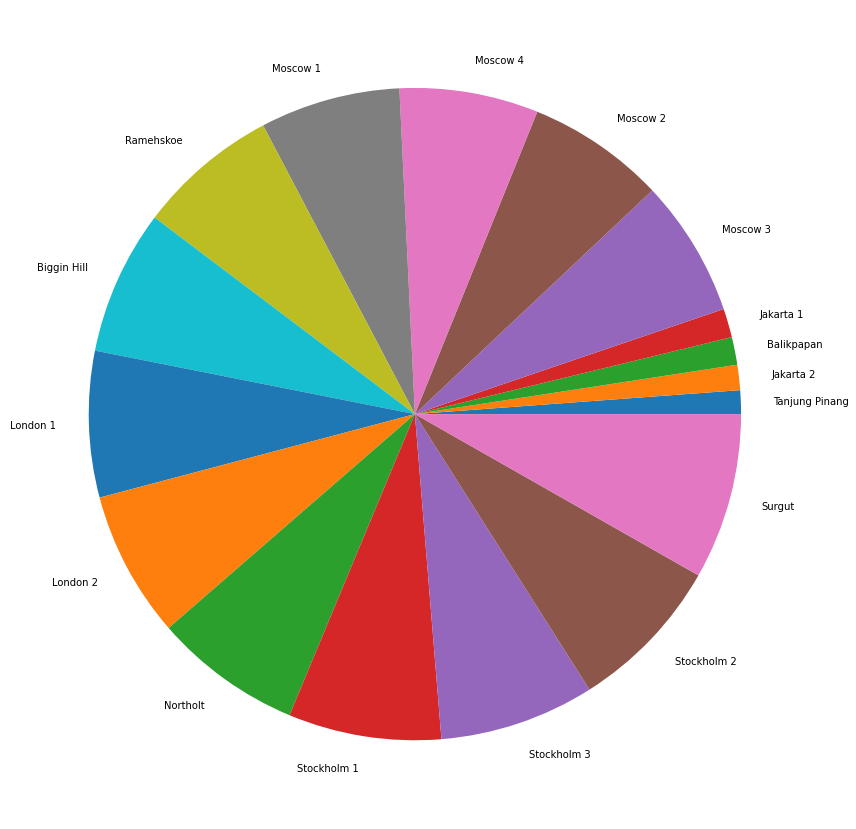

In [90]:
result.plot.pie(figsize=(15, 15), ylabel='')